# EDA

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
filename = 'C:/Users/LG/PythonDataWorkspace/DATA STUDY/240127 ONINE STORE/events.csv'

In [3]:
f = open(filename, 'r')
f.readlines()[:5]

['event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session\n',
 '2020-09-24 11:57:06 UTC,view,1996170,2.14E+18,electronics.telephone,,31.9,1.52E+18,LJuJVLEjPT\n',
 '2020-09-24 11:57:26 UTC,view,139905,2.14E+18,computers.components.cooler,zalman,17.16,1.52E+18,tdicluNnRY\n',
 '2020-09-24 11:57:27 UTC,view,215454,2.14E+18,,,9.81,1.52E+18,4TMArHtXQy\n',
 '2020-09-24 11:57:33 UTC,view,635807,2.14E+18,computers.peripherals.printer,pantum,113.81,1.52E+18,aGFYrNgC08\n']

In [4]:
data = pd.read_csv(filename)

In [5]:
data["event_time"] = pd.to_datetime(data["event_time"].str[:19])
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06,view,1996170,2.140000e+18,electronics.telephone,NaN,31.90,1.520000e+18,LJuJVLEjPT
1,2020-09-24 11:57:26,view,139905,2.140000e+18,computers.components.cooler,zalman,17.16,1.520000e+18,tdicluNnRY
2,2020-09-24 11:57:27,view,215454,2.140000e+18,NaN,NaN,9.81,1.520000e+18,4TMArHtXQy
3,2020-09-24 11:57:33,view,635807,2.140000e+18,computers.peripherals.printer,pantum,113.81,1.520000e+18,aGFYrNgC08
4,2020-09-24 11:57:36,view,3658723,2.140000e+18,NaN,cameronsino,15.87,1.520000e+18,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
481994,2020-12-21 22:13:24,view,4154736,2.140000e+18,computers.peripherals.keyboard,roccat,113.17,1.520000e+18,aIgZll0RBP
481995,2020-12-21 22:14:15,view,4156223,2.140000e+18,electronics.audio.headphone,borofone,15.56,1.520000e+18,2nhXNJGCeS
481996,2020-12-21 22:15:59,view,4102122,2.140000e+18,NaN,baseus,13.65,1.520000e+18,KCb5plBKl6
481997,2020-12-21 22:18:03,view,1413341,2.140000e+18,computers.components.cpu,amd,191.52,1.520000e+18,rLnNMr2xIw


In [6]:
list(data)

['event_time',
 'event_type',
 'product_id',
 'category_id',
 'category_code',
 'brand',
 'price',
 'user_id',
 'user_session']

## 이상치 확인

In [7]:
out_data = data.sort_values(by = "price", ascending = False)
out_data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
418716,2020-12-09 18:31:21,view,4170916,2.140000e+18,computers.peripherals.monitor,lg,64771.06,1.520000e+18,3cyaesEFAP
86316,2020-10-14 06:26:41,view,4170916,2.140000e+18,computers.peripherals.monitor,lg,64771.06,1.520000e+18,M91MkaVScv
51272,2020-10-06 06:54:04,view,4170916,2.140000e+18,computers.peripherals.monitor,lg,64771.06,1.520000e+18,pfaAniPp5L
298701,2020-11-17 11:13:29,view,4078837,2.140000e+18,electronics.video.tv,samsung,42590.13,1.520000e+18,HXN3XBovmM
324573,2020-11-20 19:28:42,view,4078837,2.140000e+18,electronics.video.tv,samsung,42590.13,1.520000e+18,JkHJ3MLtXV
395298,2020-12-04 13:58:20,view,4078837,2.140000e+18,electronics.video.tv,samsung,42590.13,1.520000e+18,5IhxKg1wPN
13638,2020-09-27 21:29:46,view,4078834,2.140000e+18,electronics.video.tv,samsung,27775.87,1.520000e+18,NGhlgCsxv1
20028,2020-09-29 08:54:53,view,4078834,2.140000e+18,electronics.video.tv,samsung,27775.87,1.520000e+18,NGhlgCsxv1
329065,2020-11-21 15:07:35,view,4078834,2.140000e+18,electronics.video.tv,samsung,27775.87,1.520000e+18,I6pge0lwoQ
447859,2020-12-15 14:55:49,view,4078834,2.140000e+18,electronics.video.tv,samsung,27775.87,1.520000e+18,NYUVyRmTda


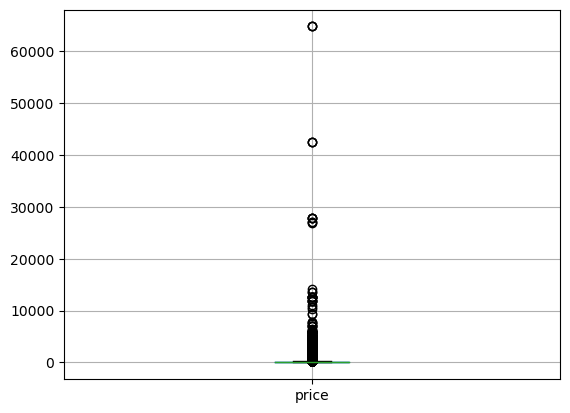

In [8]:
# boxplot
import matplotlib as mpl
import matplotlib.pyplot as plt

out_data.boxplot(column = ['price'])
plt.show()

In [9]:
# IQR
Q1 = np.quantile(out_data['price'], 0.25)
Q3 = np.quantile(out_data['price'], 0.75)
IQR = Q3 - Q1

UC = Q3 + (1.5 * IQR)
LC = Q1 - (1.5 * IQR)

out_data.loc[(out_data['price'] > UC) | (data['price'] < LC), :]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
418716,2020-12-09 18:31:21,view,4170916,2.140000e+18,computers.peripherals.monitor,lg,64771.06,1.520000e+18,3cyaesEFAP
86316,2020-10-14 06:26:41,view,4170916,2.140000e+18,computers.peripherals.monitor,lg,64771.06,1.520000e+18,M91MkaVScv
51272,2020-10-06 06:54:04,view,4170916,2.140000e+18,computers.peripherals.monitor,lg,64771.06,1.520000e+18,pfaAniPp5L
298701,2020-11-17 11:13:29,view,4078837,2.140000e+18,electronics.video.tv,samsung,42590.13,1.520000e+18,HXN3XBovmM
324573,2020-11-20 19:28:42,view,4078837,2.140000e+18,electronics.video.tv,samsung,42590.13,1.520000e+18,JkHJ3MLtXV
...,...,...,...,...,...,...,...,...,...
125258,2020-10-21 05:10:34,view,89031,2.140000e+18,NaN,NaN,319.67,1.520000e+18,5NECOxJxBR
261512,2020-11-11 19:17:35,view,89031,2.140000e+18,NaN,NaN,319.67,1.520000e+18,FiGRcSzQon
435536,2020-12-13 10:50:13,view,89031,2.140000e+18,NaN,NaN,319.67,1.520000e+18,n9Mf5w1OiZ
100326,2020-10-16 17:19:56,view,89031,2.140000e+18,NaN,NaN,319.67,1.520000e+18,zpwzL3hHYo


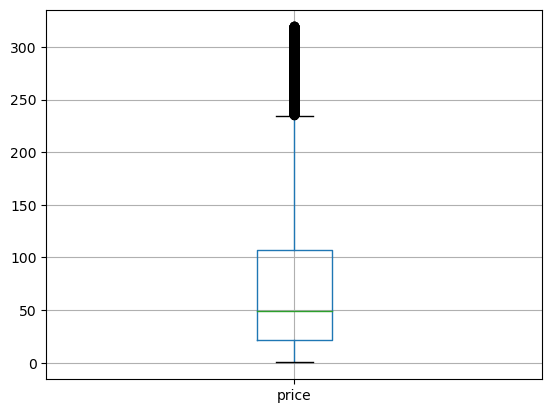

In [10]:
plt.clf() # 초기화
out_data.loc[(out_data['price'] <= UC) & (out_data['price'] >= LC), :].boxplot(column = ['price'])
plt.show()

## Unique값 확인

In [11]:
print("----------------------------------------------------------------------------")

for column in data.columns:
    if len(data[column].unique()) > 10:
        print(column + " unique값 확인")
        print(data[column].unique()[:10], "...")
        print(len(data[column].unique()), "개")
        print("----------------------------------------------------------------------------")
    else:
        print(column + " unique값 확인")
        print(data[column].unique())
        print(len(data[column].unique()), "개")
        print("----------------------------------------------------------------------------")

----------------------------------------------------------------------------
event_time unique값 확인
<DatetimeArray>
['2020-09-24 11:57:06', '2020-09-24 11:57:26', '2020-09-24 11:57:27',
 '2020-09-24 11:57:33', '2020-09-24 11:57:36', '2020-09-24 11:57:59',
 '2020-09-24 11:58:23', '2020-09-24 11:58:24', '2020-09-24 11:58:25',
 '2020-09-24 11:58:31']
Length: 10, dtype: datetime64[ns] ...
460681 개
----------------------------------------------------------------------------
event_type unique값 확인
['view' 'cart' 'purchase']
3 개
----------------------------------------------------------------------------
product_id unique값 확인
[1996170  139905  215454  635807 3658723  664325 3791349  716611  657859
  811491] ...
44732 개
----------------------------------------------------------------------------
category_id unique값 확인
[2.14e+18 2.15e+18 2.23e+18 2.22e+18 2.18e+18 2.17e+18]
6 개
----------------------------------------------------------------------------
category_code unique값 확인
['electronics.tele

## 결측치 확인

In [12]:
print("---------------------------")

row_count = data.shape[0]

for column in data.columns:
    null_count = data[column].isnull().sum()
    if null_count > 0:
        print(column + " 결측치 비율")
        print(round(null_count / row_count * 100, 2), "%")
        print("---------------------------")
    else:
        pass

---------------------------
category_code 결측치 비율
28.76 %
---------------------------
brand 결측치 비율
24.87 %
---------------------------
user_session 결측치 비율
0.03 %
---------------------------


## 데이터 정렬

In [13]:
data_copy_1 = data

group_data = data_copy_1.groupby(["user_session", "event_type"]).agg(datetime = ("event_time", "min"))

temp_df = pd.DataFrame(data_copy_1['event_type'].unique(), columns = ["event_type"])
temp_df["step"] = [1, 2, 3]
temp_df.set_index("event_type", append = False, inplace = True)

merge_data = pd.merge(group_data, temp_df, left_on = "event_type", right_index = True)

pivot_data = merge_data.reset_index().pivot(index = ["user_session"], columns = "step", values = "datetime")

pivot_data.columns = temp_df.index
pivot_data

event_type,view,cart,purchase
user_session,,,
000c34fa-991f-442a-8e07-8c472269bec6,2020-09-30 17:52:02,NaT,NaT
001P7lK0Pt,2020-11-06 01:25:30,NaT,NaT
002DmERG1w,2020-09-26 18:59:06,NaT,NaT
003QqC0jk0,2020-10-25 15:23:25,NaT,NaT
003pEktS1X,2020-11-02 18:11:24,NaT,NaT
...,...,...,...
zztce59nU2,2020-10-29 18:02:28,NaT,NaT
zztjHPLepJ,2020-11-14 18:31:44,NaT,NaT
zzvjiUwHhM,2020-12-18 10:31:55,NaT,NaT


## 전환율 확인

In [14]:
step_count = [pivot_data[event].notnull().sum() for event in pivot_data.columns]

print("event별 횟수")
for num, event in enumerate(step_count):
    print(pivot_data.columns[num], " : ", event, "회")

print("")

print("event별 전환율")
for num, event in enumerate(step_count[1:]):
    step_rate = round(event / step_count[num] * 100, 2)
    print(pivot_data.columns[num+1], " 전환율 : ", step_rate, "%")

print("")

print("view 대비 purchase 전환율")
purchase_to_view_rate = round(step_count[2] / step_count[0] * 100, 2)
print("구매전환율 : ", purchase_to_view_rate, "%")

event별 횟수
view  :  277475 회
cart  :  20870 회
purchase  :  12534 회

event별 전환율
cart  전환율 :  7.52 %
purchase  전환율 :  60.06 %

view 대비 purchase 전환율
구매전환율 :  4.52 %


## 퍼널 확인
- 이전단계 퍼널 무시된 경우 확인

In [15]:
# view 또는 cart 없이 purchase한 경우 확인
pivot_data[(pivot_data['purchase'].isnull() == False) & ((pivot_data['view'].isnull() == True) | (pivot_data['cart'].isnull() == True))]

event_type,view,cart,purchase
user_session,,,
005wDfXQrv,2020-11-06 04:40:04,NaT,2020-11-06 04:40:50
02N2rUZOAe,2020-10-10 12:45:04,NaT,2020-10-10 12:59:57
06vthDebl0,NaT,NaT,2020-11-29 01:07:53
08suCcfQTi,NaT,NaT,2020-12-03 17:36:00
0AxRBHYjov,2020-12-19 09:20:05,NaT,2020-12-19 09:10:59
...,...,...,...
zgbb6Sph4R,NaT,NaT,2020-10-27 16:25:33
ziHsiqYtEr,2020-11-09 15:17:32,NaT,2020-11-09 16:46:35
zkZqKpQZIY,NaT,NaT,2020-10-23 12:31:13


In [16]:
# view 없이 cart와 purchase한 경우 확인
pivot_data[(pivot_data['purchase'].isnull() == False) & (pivot_data['view'].isnull() == True) & (pivot_data['cart'].isnull() == False)]

event_type,view,cart,purchase
user_session,,,
3jTpf8HiYS,NaT,2020-09-29 12:57:29,2020-09-29 12:57:40
7DGcRi1GB8,NaT,2020-09-24 12:50:00,2020-09-24 12:50:55
C6RSxep5HL,NaT,2020-11-18 05:05:15,2020-11-18 05:06:31
ONO5SuHAuT,NaT,2020-10-18 18:50:06,2020-10-18 18:52:42
ulsfncCKHO,NaT,2020-12-13 06:22:02,2020-12-13 06:23:30


In [17]:
# cart 없이 view와 purchase한 경우 확인
pivot_data[(pivot_data['purchase'].isnull() == False) & (pivot_data['view'].isnull() == False) & (pivot_data['cart'].isnull() == True)]

event_type,view,cart,purchase
user_session,,,
005wDfXQrv,2020-11-06 04:40:04,NaT,2020-11-06 04:40:50
02N2rUZOAe,2020-10-10 12:45:04,NaT,2020-10-10 12:59:57
0AxRBHYjov,2020-12-19 09:20:05,NaT,2020-12-19 09:10:59
0Ivxve1T4M,2020-10-03 15:57:55,NaT,2020-10-03 16:00:19
0TzN6Y5q8A,2020-10-23 06:24:04,NaT,2020-10-23 06:37:17
...,...,...,...
zRWedIZeaN,2020-10-15 16:26:10,NaT,2020-11-07 18:38:33
zXXvCQo00H,2020-11-27 05:19:14,NaT,2020-11-27 05:24:14
ziHsiqYtEr,2020-11-09 15:17:32,NaT,2020-11-09 16:46:35


In [18]:
# view와 cart 없이 purchase한 경우 확인
pivot_data[(pivot_data['purchase'].isnull() == False) & (pivot_data['view'].isnull() == True) & (pivot_data['cart'].isnull() == True)]

event_type,view,cart,purchase
user_session,,,
06vthDebl0,NaT,NaT,2020-11-29 01:07:53
08suCcfQTi,NaT,NaT,2020-12-03 17:36:00
0B36G01Fwq,NaT,NaT,2020-12-10 06:57:39
0CDV6gnYDa,NaT,NaT,2020-10-28 09:16:30
0D8xxqmO64,NaT,NaT,2020-11-29 23:04:42
...,...,...,...
zZpdo1XMoX,NaT,NaT,2020-10-07 09:12:07
zeRYCDj209,NaT,NaT,2020-10-30 06:37:27
zeeBwyAOCG,NaT,NaT,2020-12-19 11:55:51


In [19]:
# view없이 purchase만 한 경우 확인
no_view = pivot_data[(pivot_data['purchase'].isnull() == False) & (pivot_data['view'].isnull() == True)]
no_view.sort_values(by = "purchase")

event_type,view,cart,purchase
user_session,,,
qkZG0pW1kp,NaT,NaT,2020-09-24 12:48:11
7DGcRi1GB8,NaT,2020-09-24 12:50:00,2020-09-24 12:50:55
da24222b-b213-4d89-8a7f-dde741bf9cd5,NaT,NaT,2020-09-24 13:19:23
ahwj2FCrvS,NaT,NaT,2020-09-24 13:46:02
xgVL1EKFok,NaT,NaT,2020-09-24 17:18:48
...,...,...,...
b96P6AcnZH,NaT,NaT,2020-12-21 09:44:02
NEHeXhjqhT,NaT,NaT,2020-12-21 10:11:24
vMGykwCB3K,NaT,NaT,2020-12-21 13:42:21


In [20]:
pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [21]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_unweighted
import seaborn as sns

In [22]:
set_data = pivot_data.reset_index()

set_view = set()
set_cart = set()
set_purchase = set()

for i in range(len(set_data.index)):
    temp = set_data.loc[i].isnull()[1:4] # timestamp data 제외
    if temp[0] == False:
        set_view.add(i)
    else:
        pass
    if temp[1] == False:
        set_cart.add(i)
    else:
        pass
    if temp[2] == False:
        set_purchase.add(i)
    else:
        pass

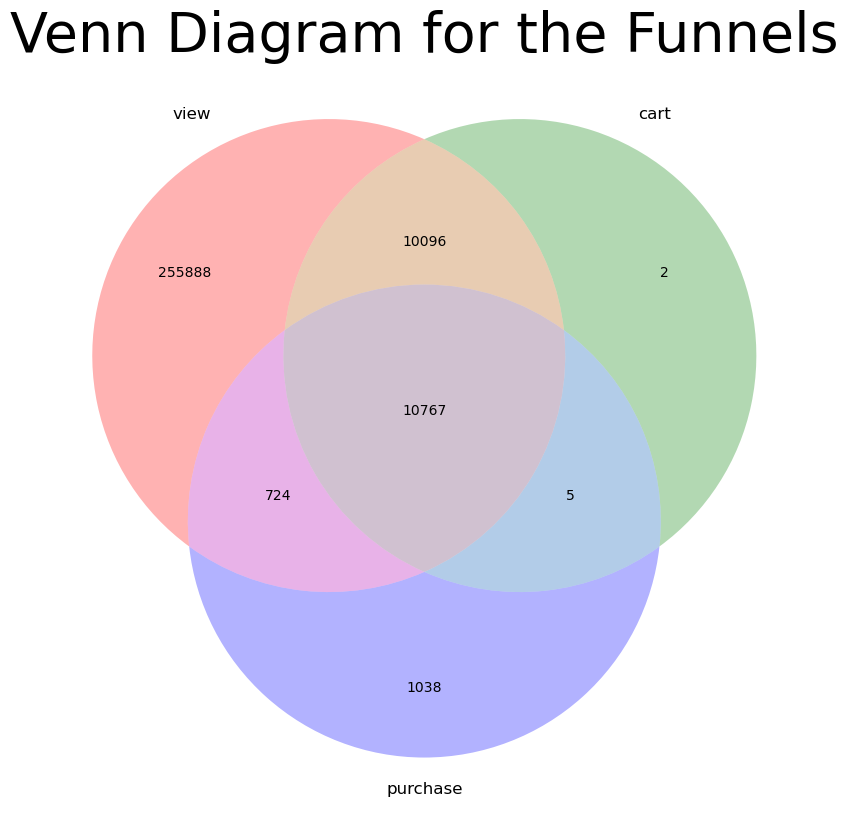

In [23]:
plt.rcdefaults()

fig = plt.figure(figsize = (10, 10))
venn3_unweighted([set_view, set_cart, set_purchase], ('view', 'cart', 'purchase'), alpha = 0.3)
plt.title('Venn Diagram for the Funnels', fontsize = 40)

# venn3.set_venn3_labels(('view', 'cart', 'purchase'), fontsize=40, color='teal')

plt.rc('font', size = 20)
# plt.rc('face', color = 'teal')

plt.show();

# 시계열 데이터 전처리
- 궁극적인 핵심 지표로 볼 수 있는 view 대비 purchase 전환율을 대상으로 함
- 이상치 관련
    - 추세 및 계절성이라는 시계열 데이터 자체의 특성을 고려할때 일반적 관측치 데이터에서는 측정되지 않는 이상치를 갖으며, 이상치의 구체적인 원인을 모르는 상태이므로 분석에서 제외 또는 다른 값으로 대체하지 않기로 한다.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm
import statsmodels.formula.api as smf

## cart 데이터 삭제

- cart 데이터 삭제 시 아래와 같이 view, purchase없이 cart만 유효한 데이터가 존재하므로 해당 데이터는 제외하기로 한다.

In [25]:
temp_reset_data = pivot_data.drop(['cart'], axis = 1)
drop_data = temp_reset_data[(temp_reset_data["view"].notnull() == False) & (temp_reset_data["purchase"].notnull() == False)]
drop_data

event_type,view,purchase
user_session,,
9qLvqjsREl,NaT,NaT
Zs6hOTQ516,NaT,NaT


- 확인 결과 cart만 유효한 데이터가 제외된 것을 알 수 있다.

In [26]:
reset_data = temp_reset_data.drop(drop_data.index)
reset_data[(reset_data["view"].notnull() == False) & (reset_data["purchase"].notnull() == False)]

event_type,view,purchase
user_session,,


## 결측치 처리 및 일별 전환율 계산(1)

### 날짜데이터 확인
- view 날짜와 purchase 날짜 비교

In [27]:
# 날짜 형식 변경
session_values = reset_data.index
view_values = pd.to_datetime(reset_data['view'].values)
purchase_values = pd.to_datetime(reset_data['purchase'].values)


def extract_date(date):
    return date.strftime('%Y-%m-%d')

# dates_only = dates.apply(extract_date)

view_values = extract_date(view_values)
purchase_values = extract_date(purchase_values)

date_data = pd.DataFrame({"session" : session_values, "view" : view_values, "purchase" : purchase_values})
date_data['comparison'] = (date_data['view'] == date_data['purchase'])
date_data

,session,view,purchase,comparison
0,000c34fa-991f-442a-8e07-8c472269bec6,2020-09-30,NaN,False
1,001P7lK0Pt,2020-11-06,NaN,False
2,002DmERG1w,2020-09-26,NaN,False
3,003QqC0jk0,2020-10-25,NaN,False
4,003pEktS1X,2020-11-02,NaN,False
...,...,...,...,...
278513,zztce59nU2,2020-10-29,NaN,False
278514,zztjHPLepJ,2020-11-14,NaN,False
278515,zzvjiUwHhM,2020-12-18,NaN,False
278516,zzxnA0nWEY,2020-11-17,NaN,False


- 아래와 같이 동일한 session에 대해 vew → purchase까지 이틀 이상이 소요되는 경우가 583개 존재
- 아래의 데이터에 한해서는 view의 경우 전환되지 않은것으로 판단하고 purchase의 경우 전환된 것으로 판단하여 분리할 필요가 있음
- online store를 운영하는 주체의 입장에서는 어차피 동일한 user가 여러개의 session으로 나뉠 수 있다는 점을 고려할 때 동일한 session을 분리하는 것은 크게 문제되지 않다고 판단했으며 일별 데이터를 구하기 위해서는 분리의 필요성이 어느정도 정당하다고 판단
- **따라서 아래와 같이 purchase까지 이틀 이상이 소요된 session에 대해 1. purchase 데이터를 NaN값 처리한 view 데이터셋과 2. purchase 데이터의 날짜를 view 데이터의 날짜에 대체하여 동일한 날짜에 purchase가 진행된 데이터셋을 구분한 후 통합 데이터셋에 합치기로 한다.**

In [28]:
temp_date_data = date_data[(date_data['comparison'] == False) & (date_data['view'].notnull() == True) & (date_data['purchase'].notnull() == True)]
temp_date_data = temp_date_data
temp_date_data

,session,view,purchase,comparison
1160,0FFITqma8A,2020-11-03,2020-11-05,False
1848,0OOE33RvrM,2020-11-19,2020-11-20,False
1849,0OPUhBAlw2,2020-10-10,2020-10-11,False
1939,0Piw70g3qf,2020-10-10,2020-10-11,False
2334,0UptbZBBLy,2020-10-20,2020-10-19,False
...,...,...,...,...
276053,zRWedIZeaN,2020-10-15,2020-11-07,False
276088,zS4jgPciUX,2020-11-30,2020-12-03,False
276276,zUphWXWbWV,2020-10-15,2020-10-16,False
277425,zkos5EldqB,2020-11-01,2020-11-02,False


In [29]:
# 기존 데이터셋에서 purchase까지 이틀 이상 소요되는 row 제거한 데이터셋 저장
temp_date_data_index = temp_date_data.index
date_data_copy = date_data.drop(temp_date_data_index).reset_index(drop = True)
date_data_copy = date_data_copy.drop("comparison", axis = 1)

# purchase까지 이틀 이상 소요되는 데이터에 대해 purchase 데이터를 NaN값 처리한 데이터셋
temp_nan = pd.DataFrame({"purchase" : [np.NaN] * 583})
temp_view = temp_date_data.drop(["purchase", "comparison"], axis = 1)
temp_view = temp_view.join(temp_nan)

# purchase까지 이틀 이상 소요되는 데이터에 대해 purchase 날짜를 view 데이터에 입힌 데이터셋
temp_purchase_date = pd.DataFrame({"view" : temp_date_data["purchase"]})
temp_purchase = temp_date_data.drop(["view", "comparison"], axis = 1)
temp_purchase = temp_purchase_date.join(temp_purchase)

# 최종 데이터셋
funnel_data = pd.concat((date_data_copy, temp_view, temp_purchase), ignore_index = True, sort = False)
funnel_data = funnel_data.reset_index(drop = True)
funnel_data

,session,view,purchase
0,000c34fa-991f-442a-8e07-8c472269bec6,2020-09-30,NaN
1,001P7lK0Pt,2020-11-06,NaN
2,002DmERG1w,2020-09-26,NaN
3,003QqC0jk0,2020-10-25,NaN
4,003pEktS1X,2020-11-02,NaN
...,...,...,...
279096,zRWedIZeaN,2020-11-07,2020-11-07
279097,zS4jgPciUX,2020-12-03,2020-12-03
279098,zUphWXWbWV,2020-10-16,2020-10-16
279099,zkos5EldqB,2020-11-02,2020-11-02


### 결측치 처리
- purchase 했음에도 view가 결측치인 경우에 대한 처리

In [30]:
# view없이 purchase만 한 경우
temp_no_view = funnel_data[(funnel_data['view'].notnull() == False) & (funnel_data['purchase'].notnull() == True)]
temp_no_view

,session,view,purchase
523,06vthDebl0,NaN,2020-11-29
683,08suCcfQTi,NaN,2020-12-03
843,0B36G01Fwq,NaN,2020-12-10
920,0CDV6gnYDa,NaN,2020-10-28
986,0D8xxqmO64,NaN,2020-11-29
...,...,...,...
276045,zZpdo1XMoX,NaN,2020-10-07
276387,zeRYCDj209,NaN,2020-10-30
276403,zeeBwyAOCG,NaN,2020-12-19
276516,zgbb6Sph4R,NaN,2020-10-27


- purchase 데이터의 날짜를 view 데이터의 날짜에 대체하여 동일한 날짜에 purchase가 진행된 것으로 간주하여 처리하기로 한다.

In [31]:
temp_no_view_index = temp_no_view.index
funnel_data_copy = funnel_data

for index in temp_no_view_index:
    funnel_data_copy["view"][index] = funnel_data_copy["purchase"][index]

funnel_data_copy[(funnel_data_copy['view'].notnull() == False) & (funnel_data_copy['purchase'].notnull() == True)]

,session,view,purchase


- 확인 결과 더이상 purchase 했음에도 view가 결측치인 데이터는 없어진 것을 알 수 있다.

### 일별 전환율 계산

In [32]:
funnel_date = funnel_data_copy["view"].values
funnel_data_copy["date"] = funnel_date
funnel_data_copy

,session,view,purchase,date
0,000c34fa-991f-442a-8e07-8c472269bec6,2020-09-30,NaN,2020-09-30
1,001P7lK0Pt,2020-11-06,NaN,2020-11-06
2,002DmERG1w,2020-09-26,NaN,2020-09-26
3,003QqC0jk0,2020-10-25,NaN,2020-10-25
4,003pEktS1X,2020-11-02,NaN,2020-11-02
...,...,...,...,...
279096,zRWedIZeaN,2020-11-07,2020-11-07,2020-11-07
279097,zS4jgPciUX,2020-12-03,2020-12-03,2020-12-03
279098,zUphWXWbWV,2020-10-16,2020-10-16,2020-10-16
279099,zkos5EldqB,2020-11-02,2020-11-02,2020-11-02


In [33]:
funnel = funnel_data_copy.drop("session", axis = 1).sort_values("date")
group_funnel = funnel.groupby("date").count()
group_funnel

,view,purchase
date,,
2020-09-24,1446,58
2020-09-25,2602,108
2020-09-26,2114,76
2020-09-27,2276,71
2020-09-28,2820,121
...,...,...
2020-12-17,3047,175
2020-12-18,2718,157
2020-12-19,2720,159


In [34]:
# 전환율 도출
funnel_conversion_rate = group_funnel
funnel_conversion_rate["conversion"] = group_funnel["purchase"] / group_funnel["view"] * 100
funnel_conversion_rate

,view,purchase,conversion
date,,,
2020-09-24,1446,58,4.011065
2020-09-25,2602,108,4.150653
2020-09-26,2114,76,3.595080
2020-09-27,2276,71,3.119508
2020-09-28,2820,121,4.290780
...,...,...,...
2020-12-17,3047,175,5.743354
2020-12-18,2718,157,5.776306
2020-12-19,2720,159,5.845588


## 결측치 처리 및 일별 전환율 계산(2)
- 위에서 진행한 결측치 처리 방식과 다르게 이번에는 view없이 purchase한 경우를 그래도 받아들이고 전환율을 먼저 계산한 후 진행하기로 한다.

### 날짜데이터 확인

In [35]:
# 날짜 형식 변경
session_values = reset_data.index
view_values = pd.to_datetime(reset_data['view'].values)
purchase_values = pd.to_datetime(reset_data['purchase'].values)


def extract_date(date):
    return date.strftime('%Y-%m-%d')

# dates_only = dates.apply(extract_date)

view_values = extract_date(view_values)
purchase_values = extract_date(purchase_values)

date_data = pd.DataFrame({"session" : session_values, "view" : view_values, "purchase" : purchase_values})
date_data

,session,view,purchase
0,000c34fa-991f-442a-8e07-8c472269bec6,2020-09-30,NaN
1,001P7lK0Pt,2020-11-06,NaN
2,002DmERG1w,2020-09-26,NaN
3,003QqC0jk0,2020-10-25,NaN
4,003pEktS1X,2020-11-02,NaN
...,...,...,...
278513,zztce59nU2,2020-10-29,NaN
278514,zztjHPLepJ,2020-11-14,NaN
278515,zzvjiUwHhM,2020-12-18,NaN
278516,zzxnA0nWEY,2020-11-17,NaN


In [36]:
start = min([pd.to_datetime(date_data['view'].values).min(), pd.to_datetime(date_data['purchase'].values).min()])
end = max([pd.to_datetime(date_data['view'].values).max(), pd.to_datetime(date_data['purchase'].values).max()])
dates = pd.date_range(start, end)
len(dates)

df_view = pd.DataFrame({'view' : [0] * len(dates)}, index = dates)
df_purchase = pd.DataFrame({'purchase' : [0] * len(dates)}, index = dates)

for i in date_data['view'].values:
    if i in df_view.index:
        df_view.loc[i] += 1
    else:
        pass

for i in date_data['purchase'].values:
    if i in df_purchase.index:
        df_purchase.loc[i] += 1
    else:
        pass

In [37]:
funnel_data = df_view.join(df_purchase, how = 'left')
funnel_data

,view,purchase
2020-09-24,1440,58
2020-09-25,2591,108
2020-09-26,2106,76
2020-09-27,2266,71
2020-09-28,2809,121
...,...,...
2020-12-17,3016,175
2020-12-18,2698,157
2020-12-19,2706,159
2020-12-20,2772,132


### 결측치 확인

In [38]:
def null_check(df):

    print("---------------------------")

    row_count = df.shape[0]

    for column in df.columns:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            print(column + " 결측치 비율")
            print(round(null_count / row_count * 100, 2), "%")
            print("---------------------------")
        else:
            print(column + " 결측치 없음")
            print("---------------------------")

null_check(funnel_data)

---------------------------
view 결측치 없음
---------------------------
purchase 결측치 없음
---------------------------


### 일별 전환율 계산

In [39]:
# 전환율 도출
funnel_conversion_rate = funnel_data
funnel_conversion_rate["conversion"] = funnel_data["purchase"] / funnel_data["view"] * 100
funnel_conversion_rate

,view,purchase,conversion
2020-09-24,1440,58,4.027778
2020-09-25,2591,108,4.168275
2020-09-26,2106,76,3.608737
2020-09-27,2266,71,3.133274
2020-09-28,2809,121,4.307583
...,...,...,...
2020-12-17,3016,175,5.802387
2020-12-18,2698,157,5.819125
2020-12-19,2706,159,5.875831
2020-12-20,2772,132,4.761905


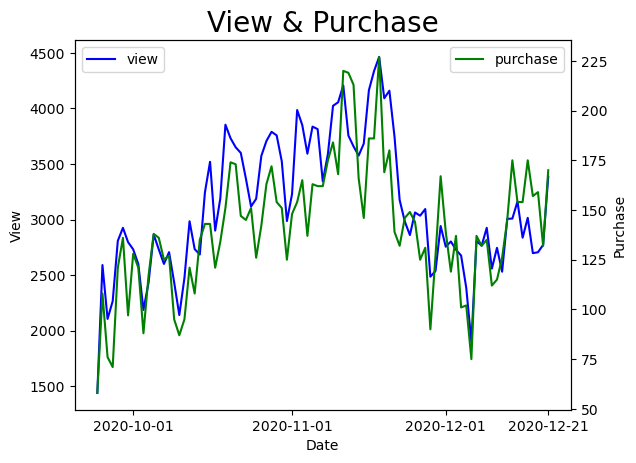

In [40]:
plt.rcdefaults() # 폰트사이즈 초기화

fig, ax1 = plt.subplots()
plt.plot(funnel_conversion_rate['view'], 'b', lw=1.5, label='view')
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('View')
plt.title('View & Purchase', fontsize = 20)
ax1.set_xticks(["2020-10-01", "2020-11-01", "2020-12-01", "2020-12-21"])

ax2 = ax1.twinx()
plt.plot(funnel_conversion_rate['purchase'], 'g', lw=1.5, label='purchase')
plt.legend(loc=1)
plt.ylabel('Purchase')
ax2.set_xticks(["2020-10-01", "2020-11-01", "2020-12-01", "2020-12-21"])
plt.show();

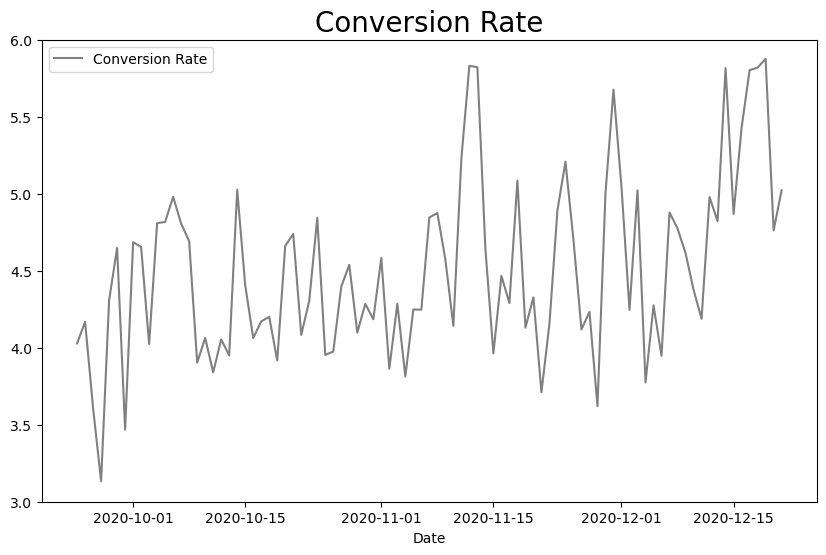

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(funnel_conversion_rate['conversion'], color = 'grey', label='Conversion Rate', lw = 1.5)
plt.title('Conversion Rate', fontsize = 20)
plt.ylim(3,6)
plt.legend(loc=0)
plt.xlabel('Date')
plt.show();

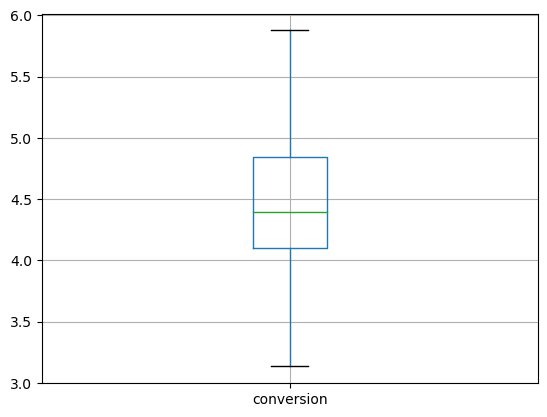

In [42]:
funnel_conversion_rate.boxplot(column = ['conversion'])
plt.show()

## 요소분해

In [43]:
temp_copy = funnel_conversion_rate['conversion']
# temp_copy_index = pd.to_datetime(temp_copy.index).strftime('%m/%d')
temp_funnel = pd.DataFrame({"Date" : temp_copy.index.values, "conversion" : temp_copy.values})
# temp_funnel['month/day'] = temp_copy_index
temp_funnel = temp_funnel.set_index('Date', drop = True)
conversion_rate = temp_funnel
conversion_rate

,conversion
Date,
2020-09-24,4.027778
2020-09-25,4.168275
2020-09-26,3.608737
2020-09-27,3.133274
2020-09-28,4.307583
...,...
2020-12-17,5.802387
2020-12-18,5.819125
2020-12-19,5.875831


In [44]:
import statsmodels.api as sm

conversion = temp_funnel['conversion']
conversion.index = pd.to_datetime(conversion.index)
conversion_index = conversion.index

s = sm.tsa.seasonal_decompose(conversion, model = 'additive')

decompose_data = pd.DataFrame({'Date' : conversion_index, 'conversion_rate' : conversion.values, 'trend' : s.trend, 'seasonal' : s.seasonal, 'residual' : s.resid})
decompose_data = decompose_data.set_index('Date', drop = True)
decompose_data.head(10)

,conversion_rate,trend,seasonal,residual
Date,,,,
2020-09-24,4.027778,NaN,0.082521,NaN
2020-09-25,4.168275,NaN,-0.082163,NaN
2020-09-26,3.608737,NaN,-0.173572,NaN
2020-09-27,3.133274,3.908805,-0.180952,-0.594578
2020-09-28,4.307583,4.002724,0.127297,0.177562
2020-09-29,4.647984,4.072091,0.108560,0.467332
2020-09-30,3.468001,4.131383,0.118310,-0.781691
2020-10-01,4.685212,4.370754,0.082521,0.231937
2020-10-02,4.653846,4.443493,-0.082163,0.292516


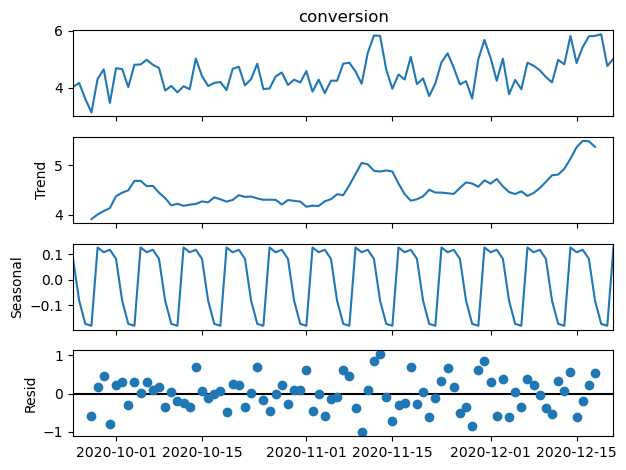

In [45]:
import matplotlib.pyplot as plt

s.plot()
#plt.clf()
#s.plot()
plt.show();

- 뚜렷한 추세보다는 강한 계절성 포착
- 승법모형의 경우 rasidual이 1에서 안정적이지만 양수에서 일종의 패턴을 보임. 즉, random하다고 보기 어려우므로 가법모형 사용

## 정상성 검정

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

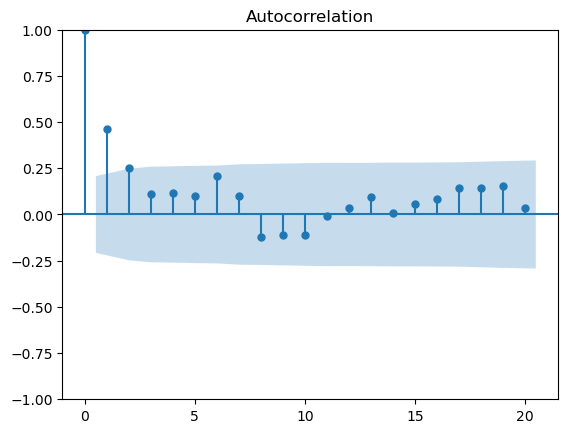

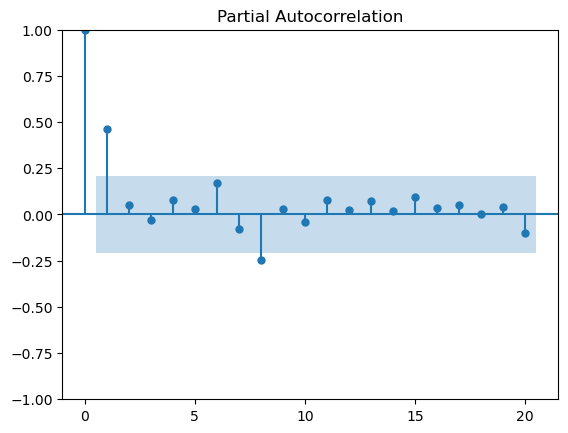

In [47]:
plot_acf(conversion_rate['conversion'])
plt.show()

plot_pacf(conversion_rate['conversion'])
plt.show()

- 디키풀러 테스트
    - 귀무가설: 시계열 자료가 정상 시계열이 아니다.
    - 대립가설: 시계열 자료가 정상 시계열이다.
    
- Kpass 테스트
    - 귀무가설: 시계열 자료가 정상 시계열이다.
    - 대립가설: 시계열 자료가 정상 시계열이 아니다.    

In [48]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Dickey-Fuller test
def stationarity_test(x):
    result_aic = adfuller(x, autolag='AIC')
    print('디키풀러 테스트(AIC)')
    print('-' * 100)
    print('Test statistic: ' , result_aic[0])
    print('p-value: '  ,result_aic[1])
    print('Critical Values:' ,result_aic[4])
    print('-' * 100)

    print('')

    kpss_test = kpss(x, regression='ct', nlags='auto')
    print('Kpass 테스트')
    print('-' * 100)
    print('Test statistic: ' , kpss_test[0])
    print('p-value: '  ,kpss_test[1])
    print('Critical Values:' ,kpss_test[3])
    print('-' * 100)

# Check mean & std
def check_mean_std(x):

    rolmean = x.rolling(window = 5).mean()
    rolstd = x.rolling(window = 5).std()

    plt.figure(figsize=(22,10))
    orig = plt.plot(x, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("conversion rate")
    plt.title('Rolling Mean & Standard Deviation', fontsize = 20)
    plt.xticks(rotation = 90)
    plt.legend()
    plt.show()

디키풀러 테스트(AIC)
----------------------------------------------------------------------------------------------------
Test statistic:  -5.60633586809553
p-value:  1.231806188701551e-06
Critical Values: {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}
----------------------------------------------------------------------------------------------------

Kpass 테스트
----------------------------------------------------------------------------------------------------
Test statistic:  0.07766411850518205
p-value:  0.1
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
----------------------------------------------------------------------------------------------------


C:\Users\LG\AppData\Local\Temp\ipykernel_36436\4117159445.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(x, regression='ct', nlags='auto')


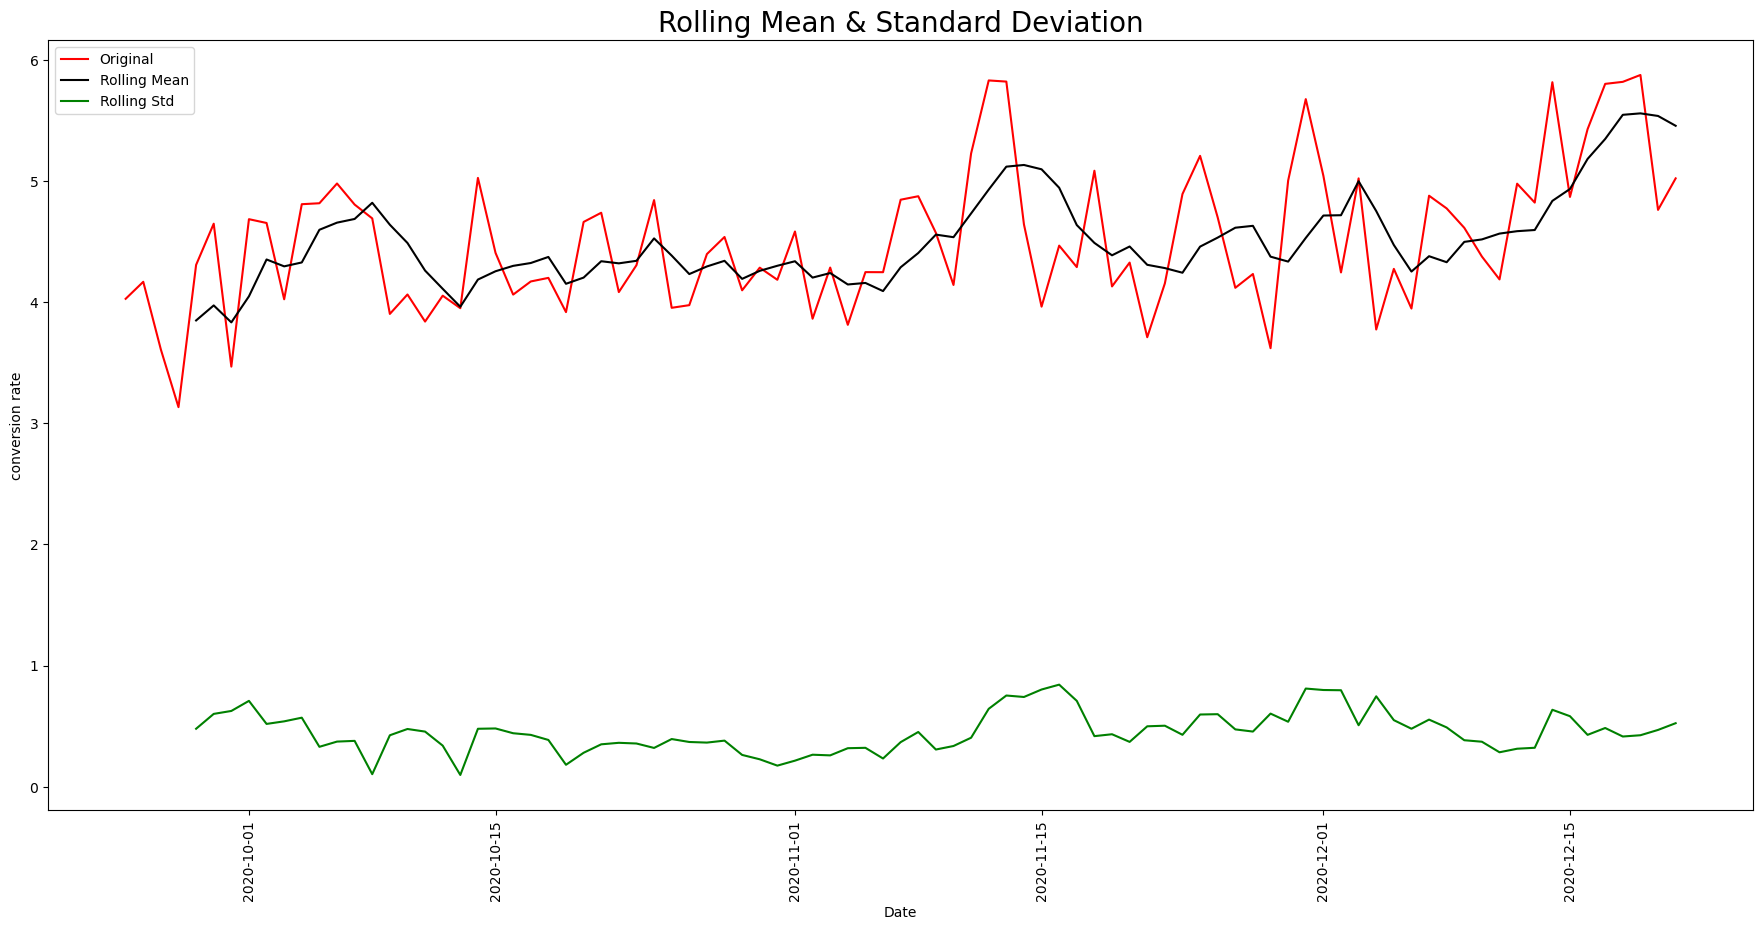

In [49]:
stationarity_test(conversion_rate)
check_mean_std(conversion_rate.conversion)

- 디키풀러 test에서는 정상성을 만족하는 것으로 보임
- 다만, ACF&PACF의 형태, Kpass 결과 등에 근거하여 1차 차분을 진행하기로 함

In [50]:
!pip install pmdarima

In [52]:
import pmdarima as pm
from pmdarima.arima import ndiffs

adf_diffs = ndiffs(conversion_rate.values, alpha=0.05, test='adf', max_d=6)

print("디키풀러에 의한 최적 차분 차수 : ", adf_diffs)

디키풀러에 의한 최적 차분 차수 :  0


# 시계열 예측

## DATA SPLIT

In [53]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(conversion_rate['conversion'], test_size = 0.3, shuffle = False)

In [54]:
train.tail(10)

Date
2020-11-15    3.963084
2020-11-16    4.466859
2020-11-17    4.289668
2020-11-18    5.085125
2020-11-19    4.130010
2020-11-20    4.326923
2020-11-21    3.710625
2020-11-22    4.154863
2020-11-23    4.892761
2020-11-24    5.207969
Name: conversion, dtype: float64

In [55]:
test.head(10)

Date
2020-11-25    4.699739
2020-11-26    4.118616
2020-11-27    4.232633
2020-11-28    3.620274
2020-11-29    5.003940
2020-11-30    5.676411
2020-12-01    5.043541
2020-12-02    4.245451
2020-12-03    5.021994
2020-12-04    3.774290
Name: conversion, dtype: float64

## ARIMA

In [56]:
import pmdarima as pm

### 모델링

In [57]:
model_arima = pm.auto_arima(train.values,
                   start_p=0,
                   start_q=0,
                   max_p=6,
                   max_q=6,
                   m=1,
                   d=1,
                   seasonal=True,
                   start_P=0,
                   D=None,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=107.350, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=104.925, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=105.421, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=101.822, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=100.038, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=101.329, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=98.264, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=99.976, Time=0.01 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=99.578, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=94.187, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=92.209, Time=0.06 sec
 AR

In [58]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   62
Model:               SARIMAX(0, 1, 2)   Log Likelihood                 -42.247
Date:                Sat, 17 Feb 2024   AIC                             90.495
Time:                        01:52:05   BIC                             96.827
Sample:                             0   HQIC                            92.976
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5935      0.111     -5.352      0.000      -0.811      -0.376
ma.L2         -0.3243      0.144     -2.251      0.024      -0.607      -0.042
sigma2         0.2275      0.050      4.546      0.0

- Ljung-box = 0.00
    - 자기상관이 있는 것으로 보이나 추가로 차분을 진행하지는 않기로 함(추가 차분 시 MAPE 커지고 신뢰구간 확대됨 - 정보손실)
- Jarque-bera = 1.93
    - 귀무가설 채택, 정규분포 형태라고 판단
- Heterokedasticity = 1.14
    - 귀무가설 채택, 등분산성을 갖는다고 판단

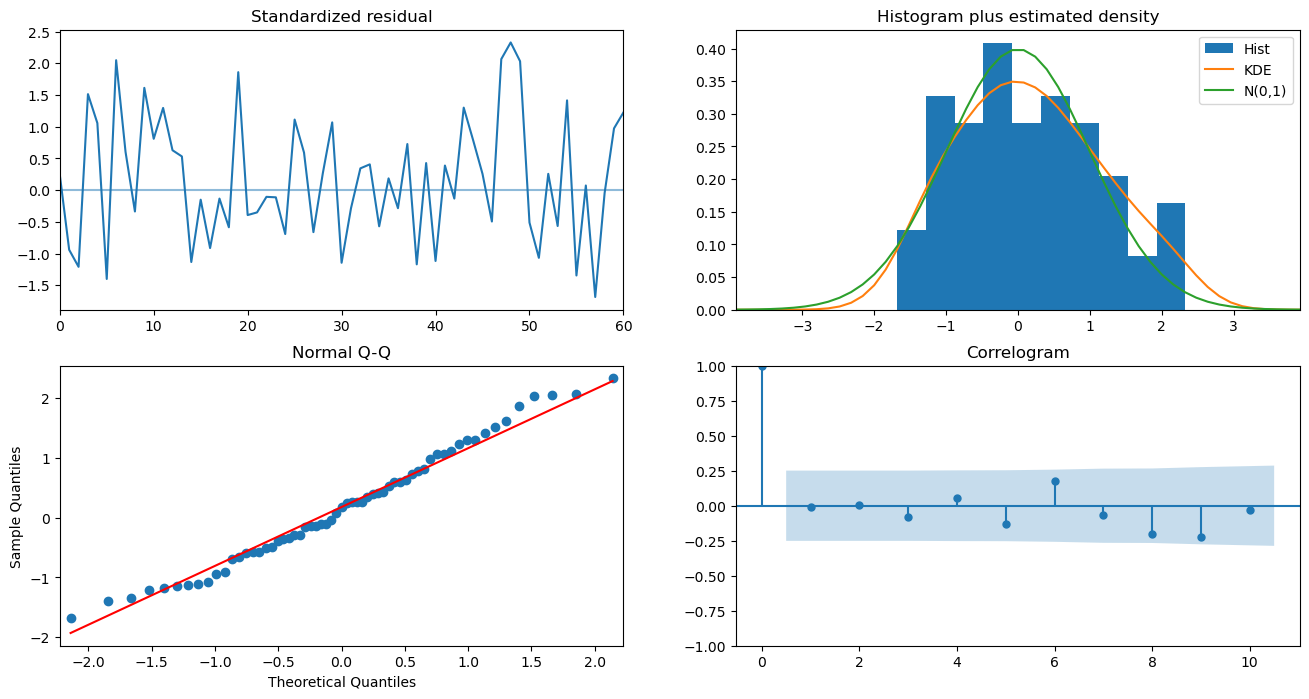

In [59]:
model_arima.plot_diagnostics(figsize=(16, 8))
plt.show()

### 평가

In [60]:
def forecast_one_step():
    fc, conf_int = model_arima.predict(n_periods=1, return_conf_int=True)
    # fc는 결과물, conf_int는 신뢰구간이며 tuple의 형태로 2열로 생성
    # return_conf_int : 신뢰구간 출력 여부
    # fc, conf_int로 저장한 결과
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
        # 각 리스트에 대해 맨 처음 데이터만을 출력한다.
    )

pred_arima = []
pred_upper = []
pred_lower = []

for new_ob in test:
    fc, conf = forecast_one_step()

    pred_arima.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    model_arima.update(new_ob) # 새로운 관측치 업데이트

In [61]:
test_predict_arima = pd.DataFrame({"test": test, "pred": pred_arima})
predict_arima = test_predict_arima['pred']
predict_arima

Date
2020-11-25    4.710828
2020-11-26    4.516886
2020-11-27    4.354433
2020-11-28    4.433738
2020-11-29    4.128366
2020-11-30    4.711790
2020-12-01    4.820778
2020-12-02    4.586774
2020-12-03    4.381628
2020-12-04    4.763777
2020-12-05    4.184860
2020-12-06    4.524269
2020-12-07    4.290262
2020-12-08    4.663069
2020-12-09    4.534469
2020-12-10    4.530485
2020-12-11    4.452605
2020-12-12    4.402426
2020-12-13    4.678117
2020-12-14    4.563280
2020-12-15    4.946532
2020-12-16    4.580582
2020-12-17    4.911039
2020-12-18    5.045481
2020-12-19    5.146675
2020-12-20    5.301641
2020-12-21    4.915110
Name: pred, dtype: float64

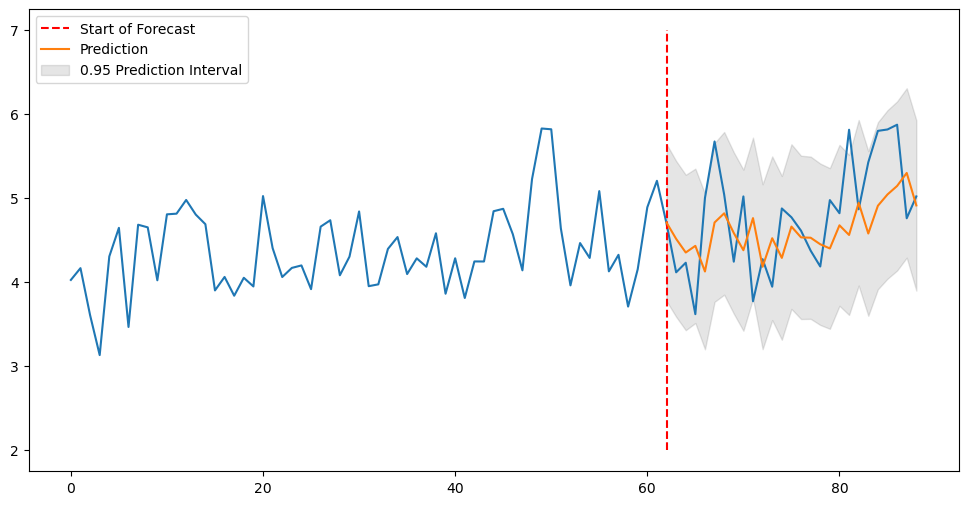

In [62]:
pred_idx_date = list(test.index)
pred_idx_int = range(int(0.7*len(conversion_rate)), int(len(conversion_rate)), 1)
train_idx_int = range(0, int(len(conversion_rate)), 1)

fig, ax = plt.subplots(figsize = (12, 6))

ax.plot(train_idx_int, conversion_rate.values)
ax.vlines(pred_idx_int[0], 2, 7, linestyle = '--', color = 'r', label = "Start of Forecast")
ax.plot(pred_idx_int, predict_arima, label = "Prediction")
ax.fill_between(pred_idx_int, pred_lower, pred_upper, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')
plt.legend(loc = 2)
plt.show()

In [63]:
def MAPE(test, pred):
	return np.mean(np.abs((test - pred) / test)) * 100

print(f"MAPE (%): {MAPE(test, predict_arima):.3f}")

MAPE (%): 10.062


### 예측

In [64]:
from datetime import datetime, timedelta

def forecast_one_step():
    fc, conf_int = model_arima.predict(n_periods=1, return_conf_int=True)
    # fc는 결과물, conf_int는 신뢰구간이며 tuple의 형태로 2열로 생성
    # return_conf_int : 신뢰구간 출력 여부
    # fc, conf_int로 저장한 결과
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
        # 각 리스트에 대해 맨 처음 데이터만을 출력한다.
    )

def forecast_step_arima():

    fc, conf = forecast_one_step()

    conf_list = [conf[0], conf[1]]

    time_index = conversion_rate.index[-1] + timedelta(days = 1)

    print(time_index.date(), "예측값")
    print("점추정 : ", fc)
    print("신뢰구간 : ", conf_list)

forecast_step_arima()

2020-12-22 예측값
점추정 :  5.110303906226632
신뢰구간 :  [4.101036162302563, 6.119571650150702]
